**Machine Learning con Python**\
Laboratorio de Pruebas - Universidad ICESI

---
Dataset tomado de https://www.kaggle.com/datasets/kandij/diabetes-dataset


EDA y clasificación de datos para aplicación de regresión logística

**Presentado por:** Felipe Flórez Olivera

**PASO 1: Importar las librerías necesarias.**

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import  f1_score, recall_score, precision_score, accuracy_score

**PASO 2: Cargar el dataset.**

In [22]:
data = pd.read_csv('diabetes2.csv')


2.1. Exploración general de la data

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Estadística descriptiva

In [23]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Hacemos un mapa de calor para observar cómo es la correlación entre variables

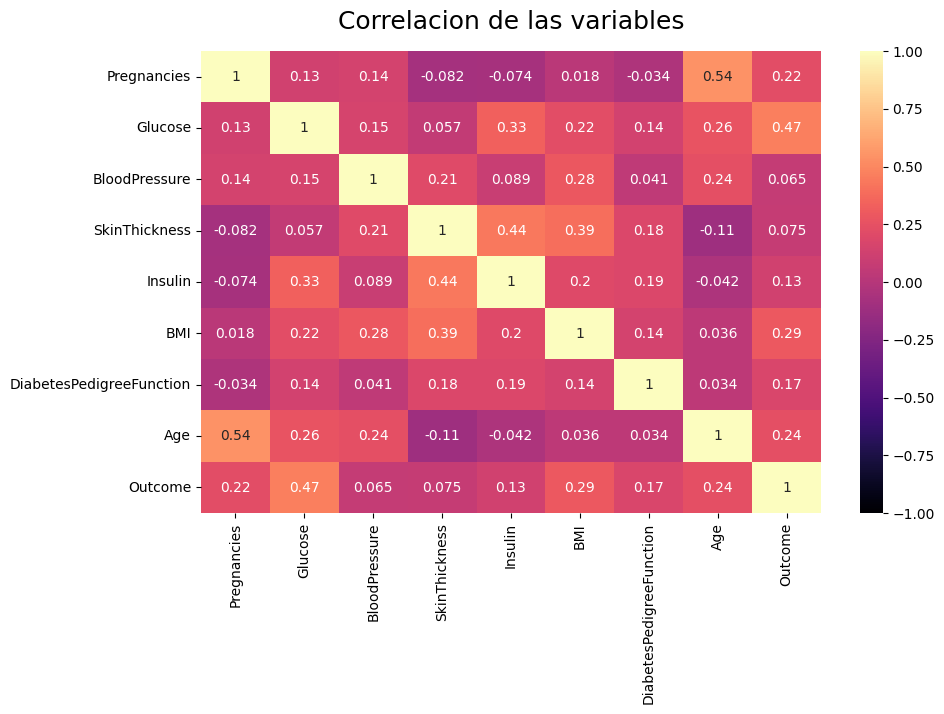

In [41]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(data.corr(), vmin = -1, vmax=1, annot=True, cmap='magma')
heatmap.set_title('Correlacion de las variables', fontdict={'fontsize': 18}, pad=16);

Caracterización del conjunto

Text(0.5, 1.0, 'Histograma por edades')

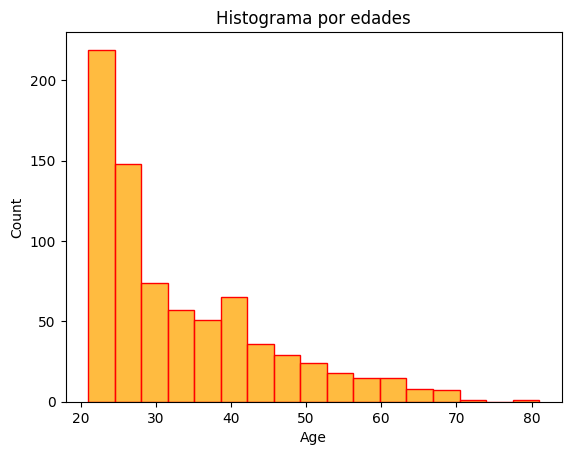

In [25]:
sns.histplot(data["Age"], color='orange', edgecolor='red')
plt.title("Histograma por edades")

<Axes: xlabel='Insulin', ylabel='count'>

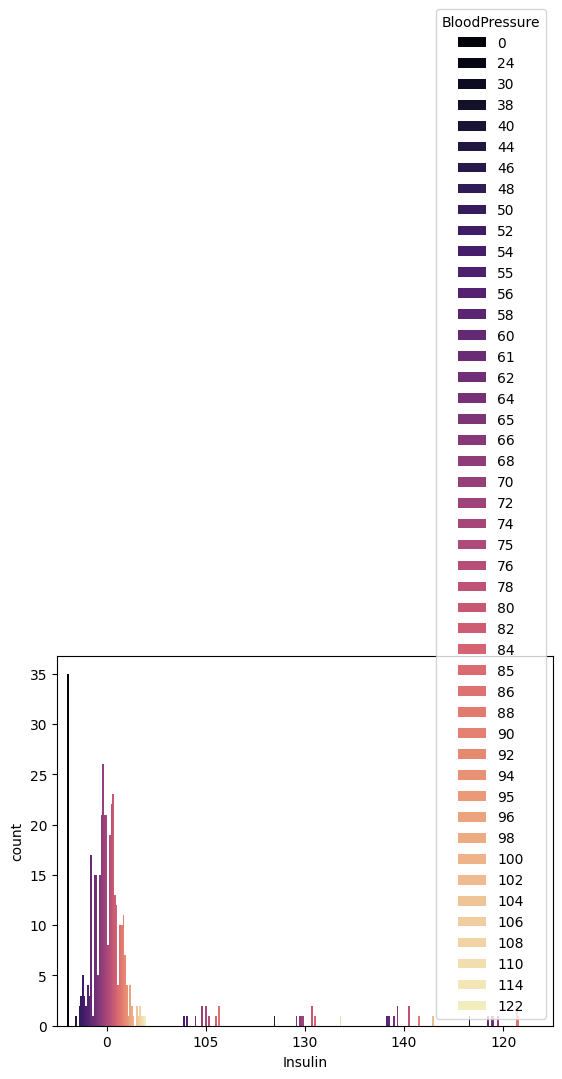

In [48]:
sns.countplot(x='Insulin',hue='BloodPressure',data=data,order=pd.value_counts(data['Insulin']).iloc[:5].index,palette='magma')

De la correlación entre insulina y presión sanguínea, se puede observar que la mayoría de individuos tiene niveles de insulina relativamente cercanos a la media ~ 80

In [59]:
x_train, x_test, y_train,y_test = train_test_split(x,y, random_state=0, test_size=0.2)
print("%d datos para training" %x_train.shape[0])
print("%d datos para testing" %x_test.shape[0])

614 datos para training
154 datos para testing


In [60]:
modelo= LogisticRegression()

In [61]:
modelo.fit(x_train, y_train)
print(modelo.coef_)

[[ 0.09089041  0.03421397 -0.01395748  0.00288146 -0.00144199  0.08916714
   0.82346349  0.01567841]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
y_pred_train= modelo.predict(x_train) # el modelo predice para cada dato una de las clases conocidas (0 o 1)
print("\nTrain   Accuracy: %.2f" % accuracy_score(y_train, y_pred_train ))
y_pred= modelo.predict(x_test)
print("\nTest    Accuracy: %.2f" % accuracy_score(y_test, y_pred ))


Train   Accuracy: 0.77

Test    Accuracy: 0.82


In [65]:
# Preguntar al modelo por un nuevo caso.
# Insertar matriz con:
# Pregnancies (0 - 17) [0]
# Glucose: (0 - 199) [1]
# BloodPressure: (0 - 122) [2]
# SkinThickness: (0 - 99) [3]
# Insulin: (0 - 846) [4]
# BMI: Body mass index (0 - 67.1) [5]
# DiabetesPedigreeFunction: (0.078 - 2.42) [6]
# Age: Age (21 - 81) [7]
# Outcome: (0 significa que no tiene diabetes, 1 significa que sí)
v=np.array([4, 80 , 100 , 50 , 200 , 13 , 1 , 30])
pred=modelo.predict(v.reshape(1, -1))
print("\nPara el nuevo caso la clasificación es:",pred)


Para el nuevo caso la clasificación es: [0]


Lo cual indica que el top 5 por edad y probabilidad de tener diabetes es:

In [73]:
#Probabilidad clasificada para personas con diabetes y sin diabetes:
data[['Age', 'Outcome']].groupby(['Age'], as_index=False).mean().sort_values(by='Outcome', ascending=False).head(5)

,Age,Outcome
49,70,1.000000
31,52,0.875000
22,43,0.846154
32,53,0.800000
38,59,0.666667


Se puede pensar en un posible sesgo en los datos, debido a que es extraño que exista la probabilidad de 100% de que una persona de 70 años tenga diabetes.